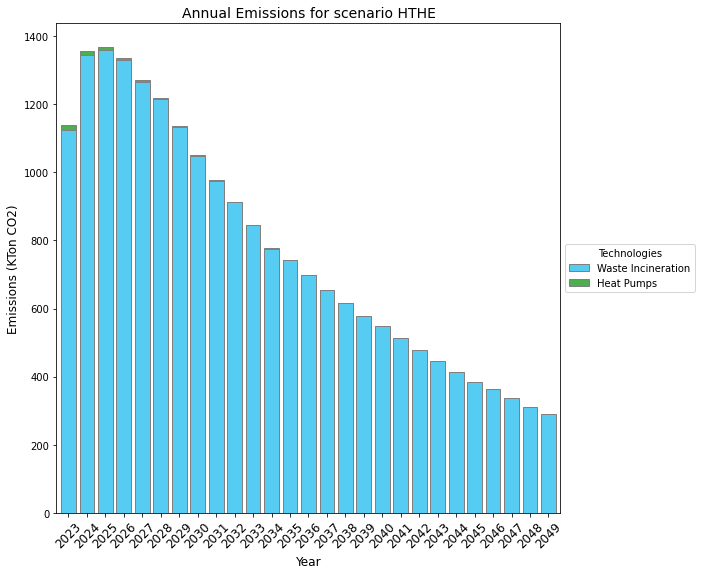

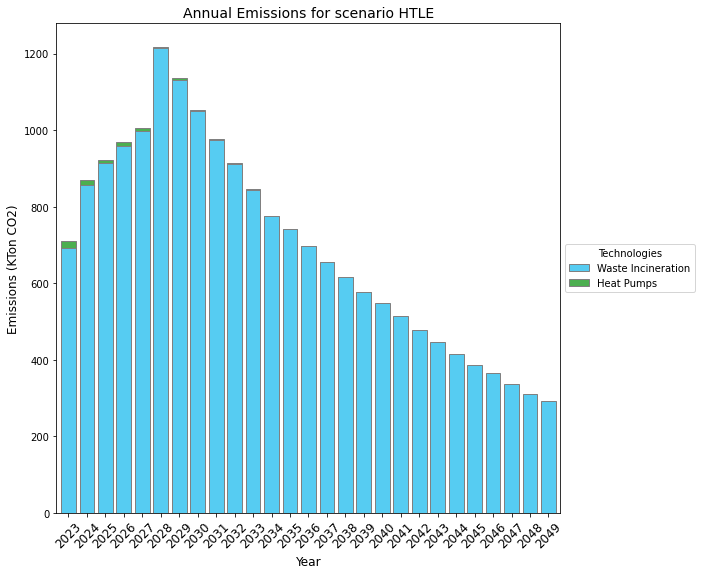

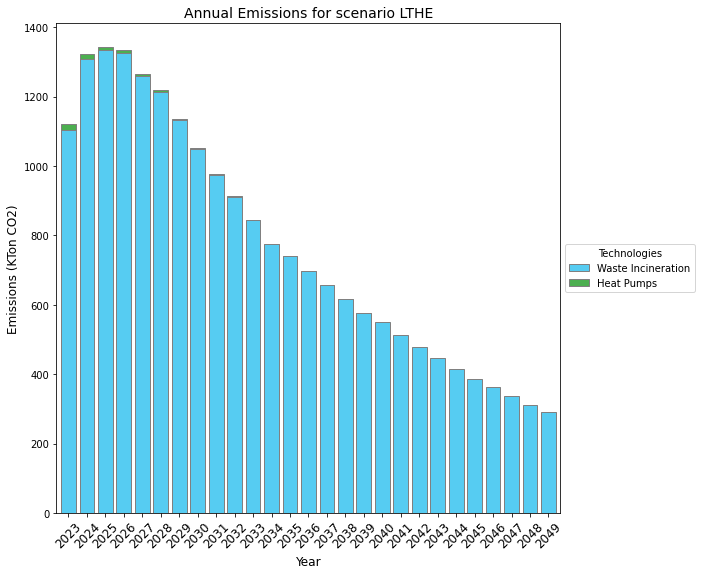

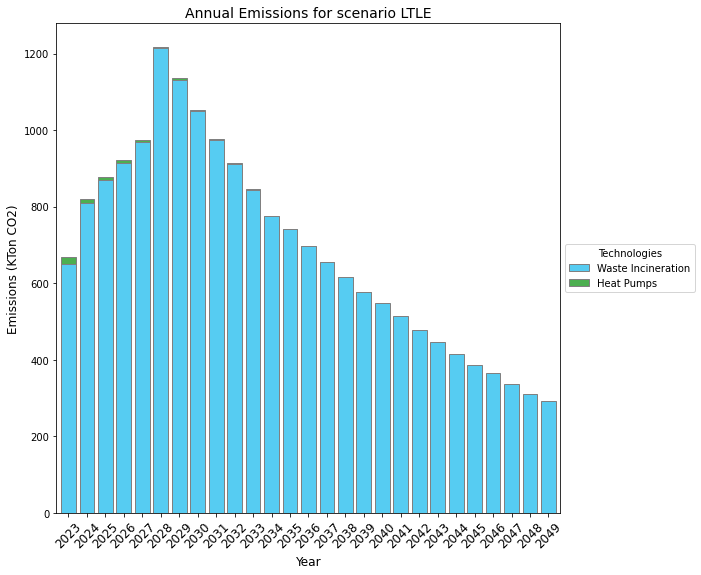

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Emissions'
# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

for i in file_names:
    if '.xlsx' in i:
        # Load the data
        PBTA = pd.read_excel(i)
        j = re.sub('AnnTechEmission_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        #Define technology names
        Names = {
            'Waste Incineration': ['MINWASTE', 'IMPWASTE'],
            'Heat Pumps': ['ELGRID'],
            'Year': ['Year']
        }

        technology_colors5 = {   
            'Waste Incineration': '#56CCF2',
            'Heat Pumps': '#4CAF50'      # Bright Mint Green
        }

        # Filter and pivot the data
        PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA.index.name = None
        pivot_PBTA_reset = pivot_PBTA.reset_index()
        pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

        # Group the data
        grouped_data = {}
        for category, columns in Names.items():
            grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
        grouped_df = pd.DataFrame(grouped_data)

        # Plot settings
        # Set up the plot with a larger size
        fig, ax = plt.subplots(figsize=(10, 8))  # Adjusted figure size

        # Create stacked bar chart
        grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)

        # Add labels and title
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Emissions (KTon CO2)', fontsize=12)
        plt.title(f'Annual Emissions for scenario {j}', fontsize=14)

        # Filter legend to only show technologies present in the plot
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

        # Set the font size for ticks
        plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
        plt.yticks(fontsize=10)

        # Adjust layout to prevent overlap and make it spacious
        plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)  # Adjust margins as needed

        # Save fig
        plt.savefig(f'Annual Emissions_{j}.png', format='png', dpi=800, bbox_inches='tight')

        # Show plot
        plt.show()

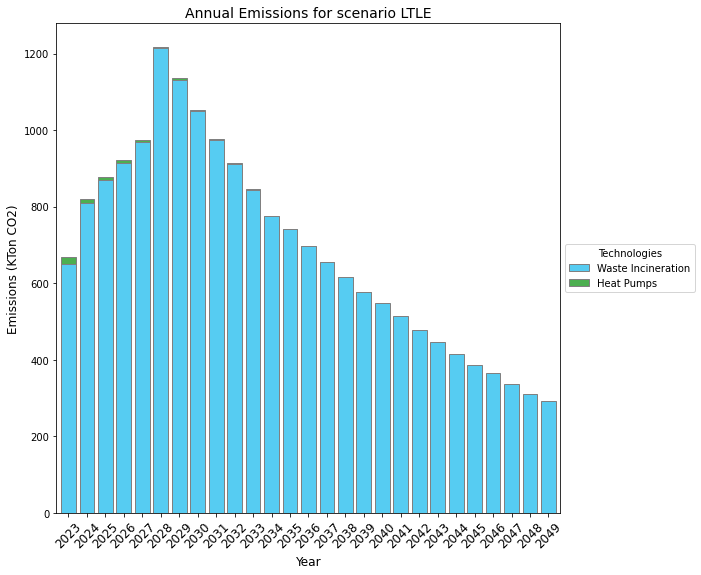

In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

PBTA = pd.read_excel('AnnTechEmission_LTLE.xlsx')
i = 'AnnTechEmission_LTLE.xlsx'
j = re.sub('AnnTechEmission_', '', i, flags=re.IGNORECASE)
j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
#Define technology names
Names = {
    'Waste Incineration': ['MINWASTE', 'IMPWASTE'],
    'Heat Pumps': ['ELGRID'],
    'Year': ['Year']
}

technology_colors5 = {   
    'Waste Incineration': '#56CCF2',
    'Heat Pumps': '#4CAF50'      # Bright Mint Green
}

# Filter and pivot the data
PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
pivot_PBTA.index.name = None
pivot_PBTA_reset = pivot_PBTA.reset_index()
pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

 # Group the data
grouped_data = {}
for category, columns in Names.items():
    grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
grouped_df = pd.DataFrame(grouped_data)

# Plot settings
# Set up the plot with a larger size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjusted figure size

# Create stacked bar chart
grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, edgecolor='grey', width=0.8, ax=ax)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Emissions (KTon CO2)', fontsize=12)
plt.title(f'Annual Emissions for scenario {j}', fontsize=14)

# Filter legend to only show technologies present in the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

# Set the font size for ticks
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)

# Adjust layout to prevent overlap and make it spacious
plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)  # Adjust margins as needed

# Save fig
plt.savefig(f'Annual Emissions_{j}.png', format='png', dpi=800, bbox_inches='tight')

# Show plot
plt.show()

In [3]:
grouped_df

,Waste Incineration,Heat Pumps,Year
0,651.542765,17.346240,2023
1,809.303100,11.740426,2024
2,868.873862,9.492263,2025
3,914.036587,8.089407,2026
4,969.076659,6.367123,2027
5,1213.662000,4.163592,2028
6,1131.644000,3.652441,2029
7,1048.886000,2.865461,2030
8,974.336000,2.059867,2031
9,912.006000,1.530717,2032


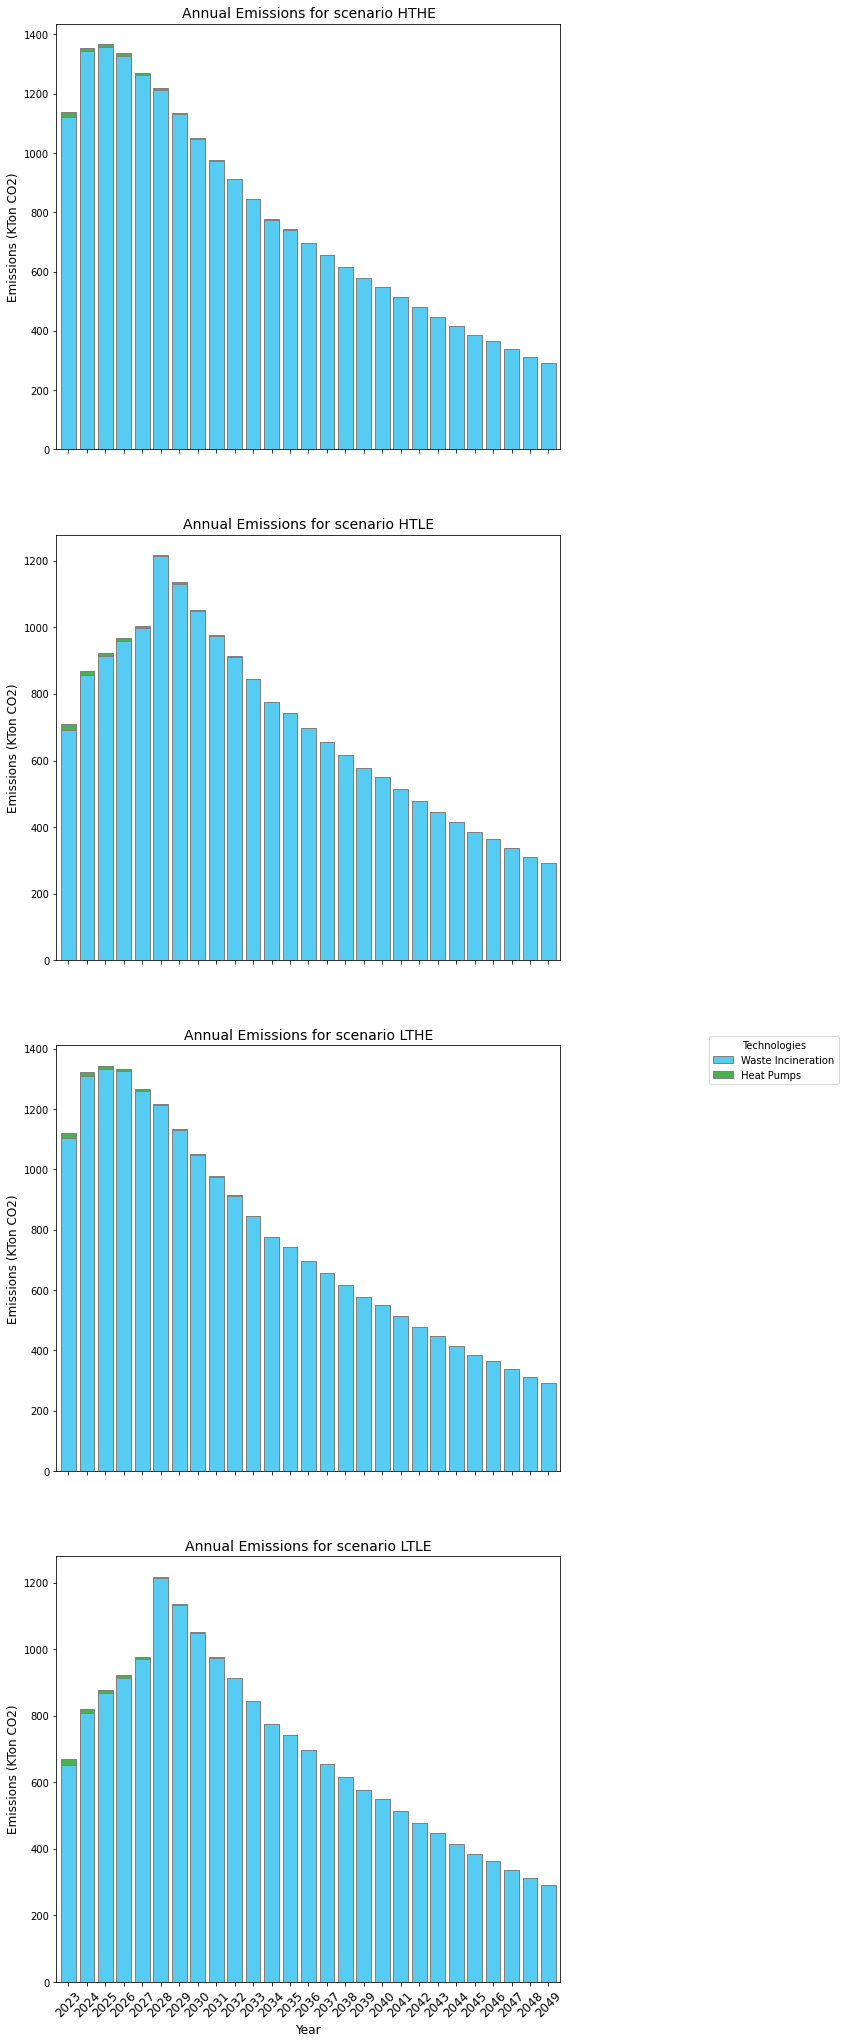

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Emissions'
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

# Define technology names and colors outside the loop
Names = {
    'Waste Incineration': ['MINWASTE', 'IMPWASTE'],
    'Heat Pumps': ['ELGRID'],
    'Year': ['Year']
}
technology_colors5 = {
    'Waste Incineration': '#56CCF2',
    'Heat Pumps': '#4CAF50'  # Bright Mint Green
}

# Set up the overall plot figure
num_files = sum(1 for i in file_names if '.xlsx' in i)  # Count the number of Excel files
fig, axes = plt.subplots(num_files, 1, figsize=(10, 8 * num_files), sharex=True)  # Dynamic figure size
if num_files == 1:  # Ensure axes is iterable even with one plot
    axes = [axes]

# Loop through each Excel file and create subplots
for idx, i in enumerate(file_names):
    if '.xlsx' in i:
        PBTA = pd.read_excel(os.path.join(directory_path, i))
        j = re.sub('AnnTechEmission_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)

        # Filter and pivot the data
        PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA.index.name = None
        pivot_PBTA_reset = pivot_PBTA.reset_index()
        pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

        # Group the data
        grouped_data = {}
        for category, columns in Names.items():
            grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
        grouped_df = pd.DataFrame(grouped_data)

        # Plot stacked bar chart on respective subplot
        grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, 
                                          edgecolor='grey', width=0.8, ax=axes[idx], legend=False)

        # Add title and labels for each subplot
        axes[idx].set_title(f'Annual Emissions for scenario {j}', fontsize=14)
        axes[idx].set_ylabel('Emissions (KTon CO2)', fontsize=12)
        axes[idx].tick_params(axis='x', labelsize=12, rotation=45)
        axes[idx].tick_params(axis='y', labelsize=10)

# Set common xlabel for the entire figure
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)

# Add one legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Technologies', ncol=1, fontsize=10)

# Adjust layout
plt.subplots_adjust(left=0.1, right=0.8, top=0.95, bottom=0.1)

# Save the combined figure
plt.savefig('Combined_Annual_Emissions.png', format='png', dpi=800, bbox_inches='tight')

# Show combined plot
plt.show()


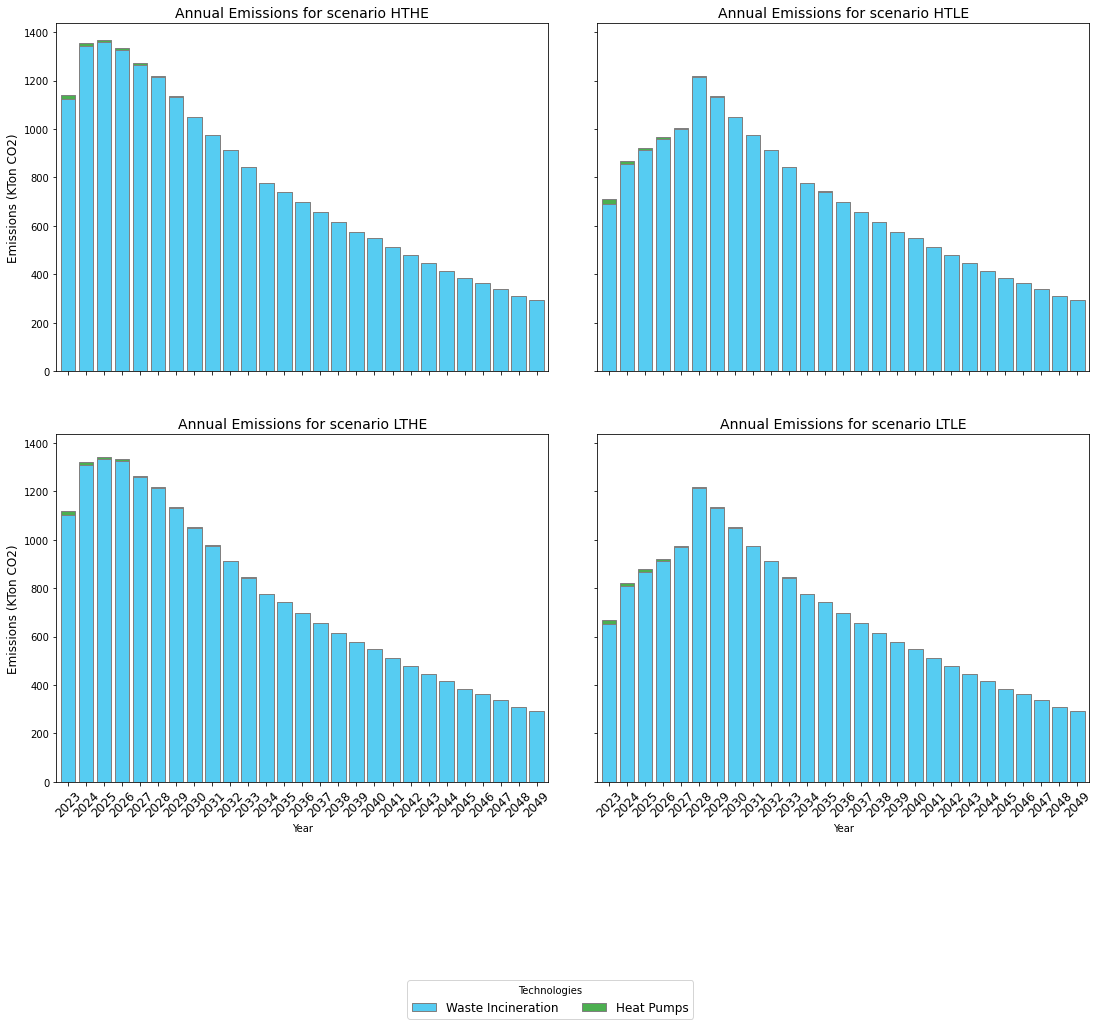

In [7]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Emissions'
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file)) and '.xlsx' in file]

# Define technology names and colors outside the loop
Names = {
    'Waste Incineration': ['MINWASTE', 'IMPWASTE'],
    'Heat Pumps': ['ELGRID'],
    'Year': ['Year']
}
technology_colors5 = {
    'Waste Incineration': '#56CCF2',
    'Heat Pumps': '#4CAF50'  # Bright Mint Green
}

# Set up a larger 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(18, 14), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through each Excel file and create subplots
for idx, i in enumerate(file_names[:4]):  # Limit to 4 files
    PBTA = pd.read_excel(os.path.join(directory_path, i))
    j = re.sub('AnnTechEmission_', '', i, flags=re.IGNORECASE)
    j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)

    # Filter and pivot the data
    PBTA = PBTA.loc[PBTA['TECHNOLOGY'].isin([item for sublist in Names.values() for item in sublist])]
    pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
    pivot_PBTA.index.name = None
    pivot_PBTA_reset = pivot_PBTA.reset_index()
    pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

    # Group the data
    grouped_data = {}
    for category, columns in Names.items():
        grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
    grouped_df = pd.DataFrame(grouped_data)

    # Plot stacked bar chart on respective subplot
    grouped_df.set_index('Year').plot(kind='bar', stacked=True, color=technology_colors5, 
                                      edgecolor='grey', width=0.8, ax=axes[idx], legend=False)

    # Add title and labels for each subplot
    axes[idx].set_title(f'Annual Emissions for scenario {j}', fontsize=14)
    axes[idx].set_ylabel('Emissions (KTon CO2)', fontsize=12)
    axes[idx].tick_params(axis='x', labelsize=12, rotation=45)
    axes[idx].tick_params(axis='y', labelsize=10)

# Hide any unused subplots if there are fewer than 4 files
for ax in axes[len(file_names):]:
    ax.axis('off')

# Adjust layout with more padding
plt.tight_layout(pad=4.0, rect=[0.05, 0.05, 0.95, 0.95])

# Move legend to the bottom after tight layout adjustments
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), title='Technologies', ncol=len(technology_colors5), fontsize=12)

# Show combined plot
plt.show()
